In [1]:
import os
import imageio

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

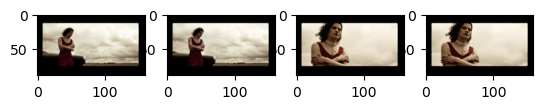

In [2]:
path = 'data/validation/cuts/0-100.gif'
gif_arr = np.array(imageio.mimread(path))

fig, axs = plt.subplots(1, 4)
for i in range(4):
    axs[i].imshow(gif_arr[i])

In [3]:
class GifBinaryGenerator:
    def __init__(self, batch_size=64, rescale=None):
        """
        
        """
        self.batch_size = batch_size
        self.rescale = rescale
    
    
    def flow_from_directories(self, path_class_0, path_class_1, gif_length=4):
        """
        Yields tuples (X, y) of np.arrays shapes (self.batch_size, gif_length, width, height, 3) and (self.batch_size)
        
        Parameters:
        -----------
        path_class_0 : str
            The way to class, label 0
            
        path_class_1 : str
            The way to class, label 1
            
        gif_length : int
            Ignoring gifs with another lengths
        """
        filenames_class_0 = [os.path.join(path_class_0, filename) for filename in os.listdir(path_class_0)]
        filenames_class_1 = [os.path.join(path_class_1, filename) for filename in os.listdir(path_class_1)]
        
        filenames = np.concatenate([filenames_class_0, filenames_class_1])
        answers = np.concatenate([np.zeros(len(filenames_class_0)), np.ones(len(filenames_class_1))])
        length = len(answers)
        
        indexes = np.arange(length)
        np.random.shuffle(indexes)
        filenames = filenames[indexes]
        answers = answers[indexes]
        
        for i in range((length-1)//self.batch_size):
            try:
                X, y = None, None
                filenames_i = filenames[i*self.batch_size : (i+1)*self.batch_size]
                X = np.array([np.array(imageio.mimread(filename)) for filename in filenames_i])
                if self.rescale is not None:
                    X = X*self.rescale
                y = answers[i*self.batch_size : (i+1)*self.batch_size]
                yield (X, y)
            except ValueError:
                df = pd.DataFrame({'filename' : filenames_i, 
                                   'length' : [np.array(imageio.mimread(filename)).shape[0] for filename in filenames_i]})
                ignore_filenames = df[df['length'] != gif_length]['filename'].values
                for filename in ignore_filenames:
                    print(f'Gif {filename} has wrong length, so ignoring.')
                
        try:
            filenames_i = filenames[(length-1)//self.batch_size * self.batch_size:]
            X = np.array([np.array(imageio.mimread(filename)) for filename in filenames_i])
            if self.rescale is not None:
                X = X*self.rescale
            y = answers[(length-1)//self.batch_size * self.batch_size:]
            yield X, y
        except ValueError:
            df = pd.DataFrame({'filename' : filenames_i, 
                               'length' : [np.array(imageio.mimread(filename)).shape[0] for filename in filenames_i]})
            ignore_filenames = df[df['length'] != gif_length]['filename'].values
            for filename in ignore_filenames:
                print(f'Gif {filename} has wrong length, so ignoring.')

In [4]:
path_class_0 = 'data/validation/noncuts'
path_class_1 = 'data/validation/cuts'

In [5]:
for X, y in GifBinaryGenerator(batch_size=64, rescale=1/255).flow_from_directories(path_class_0, path_class_1):
    print(f'X.shape = {X.shape}')
    print(f'y.shape = {y.shape}')
    print()

X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

Gif data/validation/cuts/1-141.gif has wrong length, so ignoring.
X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

Gif data/validation/noncuts/1-1769.gif has wrong length, so ignoring.
Gif data/validation/noncuts/1-2017.gif has wrong length, so ignoring.
X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

Gif data/validation/noncuts/1-2015.gif has wrong length, so ignoring.
Gif data/validation/noncuts/0-2161.gif has wrong length, so ignoring.
X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

Gif data/validation/cuts/1-140.gif has wrong length, so ignoring.
X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

X.shape = (64, 4, 90, 160, 3)
y.shape = (64,)

Gif data/validation/noncuts/0-2166.gif has wrong length, so ignoring.
X.shape = (20, 4, 90, 160, 3)
y.shape = (20,)



Need to remove wrong gifs in previous stage.

Edit a `Data Extraction and Augmentation.ipynb` file.